# Linear Regression 2

## Isai Ambrocio - A01625101

Download the "breast_cancer" database available in canvas. This database contains information on the characteristics of various tumors.

Use a multiple linear regression model to predict tumor radius. The regressor variables of your model should be all the variables in the database.



#### 1. Complete database. No missing values are observed. In case of missing values, simple imputation is performed.

In [322]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme()

In [250]:
df = pd.read_csv("/content/breast_cancer.csv")

In [251]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [252]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing data and therefore no imputations have to be made.

In [253]:
df.drop("id", axis=1, inplace=True)

In [254]:
df.drop("diagnosis", axis=1, inplace=True)

#### 2. Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

In [255]:
correlation_matrix = df.corr()
correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


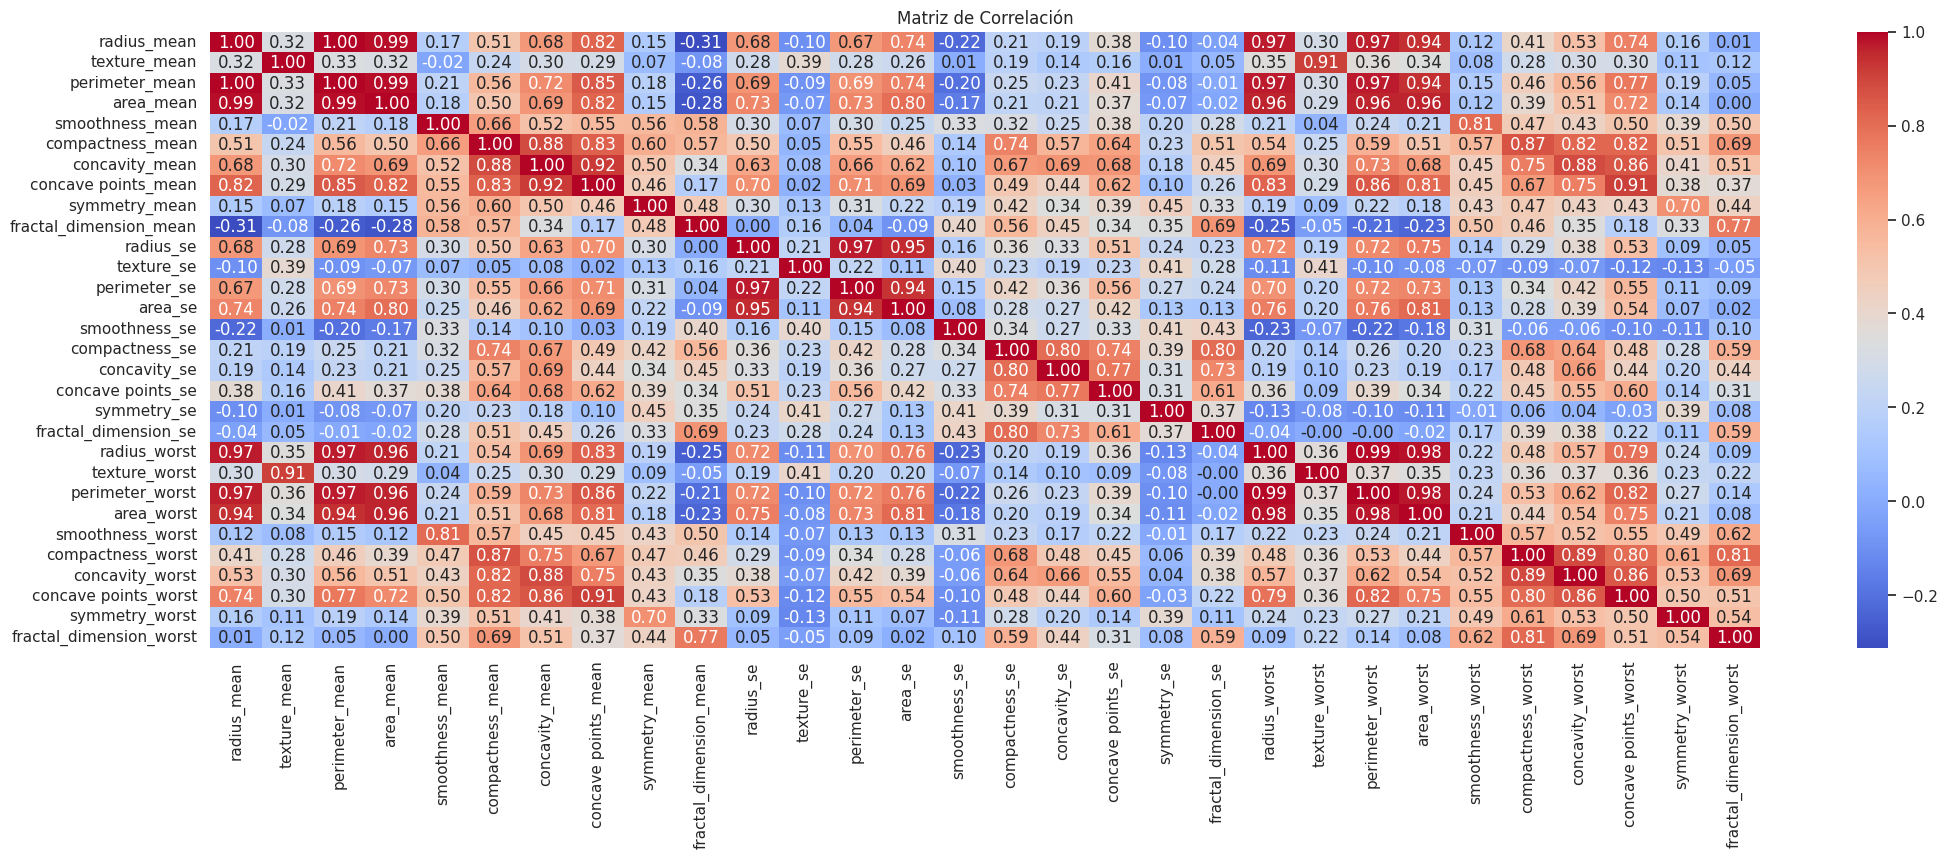

In [256]:
plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#### Model

$$ Y = \beta X + \epsilon$$
$$ \hat{Y} = \beta^* X $$
$$ \beta X = \beta_0 (1) + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p $$

We define the dependent and independent variables of our model.

In [257]:
x = df[["texture_mean", "perimeter_mean", "area_mean","smoothness_mean",
        "compactness_mean", "concavity_mean", "concave points_mean",
        "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
        "perimeter_se",	"area_se",	"smoothness_se", "compactness_se",
        "concavity_se", "concave points_se","symmetry_se",
        "fractal_dimension_se", "radius_worst","texture_worst","perimeter_worst",
        "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
        "concave points_worst", "symmetry_worst","fractal_dimension_worst"]]


y = df["radius_mean"]

We add an intercept to the model. The main reason is to ensure that the regression model considers an independent or constant term in the regression equation. Likewise, we create and adjust the linear regression model.

In [258]:
high_correlation = np.where((correlation_matrix > 0.95)&(correlation_matrix < 1))

In [259]:
high_correlation

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

In [260]:
low_correlation = np.where((correlation_matrix < -0.95)&(correlation_matrix > -1))

In [261]:
low_correlation

(array([], dtype=int64), array([], dtype=int64))

There is only positive correlation

#### 3. Null hypothesis of regression coefficients. Test statistic, distribution of the test statistic.

For 95% confidence, make a diagram showing the distribution of the test statistic, the acceptance zone and the rejection zone.

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [263]:
scaler = StandardScaler()

In [264]:
x_train_std = scaler.fit_transform(x_train)
x_train_std
x_test_std = scaler.transform(x_test)

In [265]:
x_train_std = pd.DataFrame(x_train_std, columns = x.columns)

In [266]:
x_train_std

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.262201,1.274578,1.225251,-0.428486,0.323275,0.734572,0.918587,0.515450,-0.921932,0.537347,...,1.752370,0.794547,1.397755,1.326533,-0.340930,0.431130,1.421435,1.264597,1.697056,0.461697
1,0.330120,1.224885,1.157012,0.716595,0.403390,0.860571,1.230720,0.179546,-0.490537,0.521011,...,1.191436,0.111220,1.077636,1.098773,0.725731,0.007193,0.488026,0.579282,0.283887,-0.305292
2,3.347182,0.516761,0.283838,0.681916,1.149226,1.087617,0.952445,1.013889,0.489780,-0.555081,...,0.491307,3.899547,0.601945,0.296358,2.442045,1.923135,1.397118,1.353718,0.985665,1.942929
3,-0.095244,-0.740470,-0.671222,-0.085170,-0.933201,-0.718024,-0.666679,0.396258,-0.537548,-0.260310,...,-0.682500,-0.494198,-0.729093,-0.630099,-0.340930,-1.045689,-0.845402,-0.770450,0.655605,-0.750416
4,-0.246329,-1.248994,-1.020094,-0.926468,-0.941785,-0.912261,-1.116654,-0.470591,0.160703,-0.201001,...,-1.033603,-0.145230,-1.049213,-0.850851,0.269217,-0.803349,-0.970122,-1.356809,0.256649,-0.298833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.685640,-0.111855,-0.146067,-0.626847,-0.929577,-0.909392,-0.716938,-1.395231,-0.570732,-0.511043,...,-0.210900,0.010588,-0.282422,-0.300373,-0.762327,-0.959636,-1.022685,-0.887230,-0.856902,-0.708971
451,-1.329496,-0.554536,-0.568295,0.938537,-0.258706,-0.625085,-0.529129,-0.553665,0.431708,-0.521698,...,-0.555771,-1.581678,-0.576214,-0.553537,0.853028,-0.564806,-0.511320,-0.604960,-0.185567,-0.203565
452,-0.051080,-0.650609,-0.617200,-0.538070,-0.660999,-0.763808,-0.900779,-1.001537,-0.330147,-0.625045,...,-0.586934,-0.085176,-0.627074,-0.559844,-0.204854,-0.407886,-0.581934,-0.678716,-0.579716,-0.235321
453,-1.162140,-0.804657,-0.706479,-0.185738,-1.238593,-1.078217,-1.181091,0.519062,-0.656458,-0.570708,...,-0.815462,-1.059039,-0.861928,-0.714546,-0.297035,-1.132501,-1.246661,-1.570240,-0.222418,-1.100270


In [267]:
x_train_const = sm.add_constant(x_train_std)

In [268]:
model = sm.OLS(y_train.values, x_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.381e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:27   Log-Likelihood:                 651.44
No. Observations:                 455   AIC:                            -1243.
Df Residuals:                     425   BIC:                            -1119.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Calcular los grados de libertad (n - k)

In [269]:
df_degrees_freedom = len(y_train) - len(x_train_const.columns)

In [270]:
confidence_level = 0.95

In [271]:
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha / 2, df_degrees_freedom)
print("Valor crítico de t:", t_critical)

Valor crítico de t: 1.9655614588324097


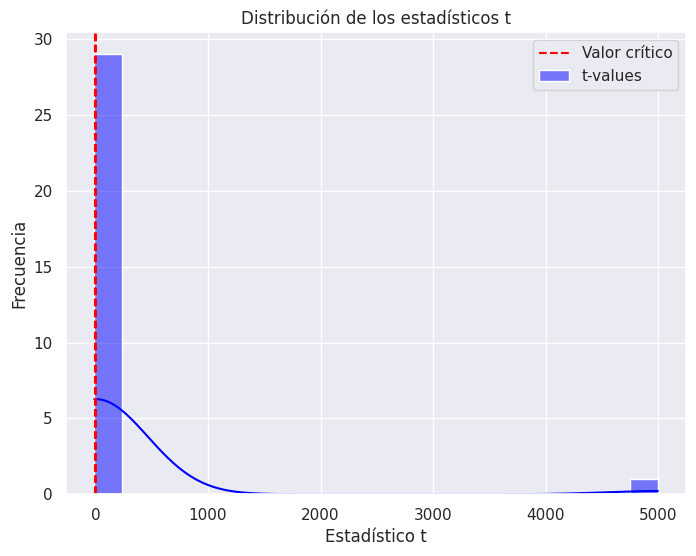

In [272]:
plt.figure(figsize=(8, 6))
sns.histplot(model.tvalues, kde=True, bins=20, color="blue", label="t-values")
plt.axvline(t_critical, color="red", linestyle="--", label="Valor crítico")
plt.axvline(-t_critical, color="red", linestyle="--")
plt.xlabel("Estadístico t")
plt.ylabel("Frecuencia")
plt.title("Distribución de los estadísticos t")
plt.legend()
plt.show()

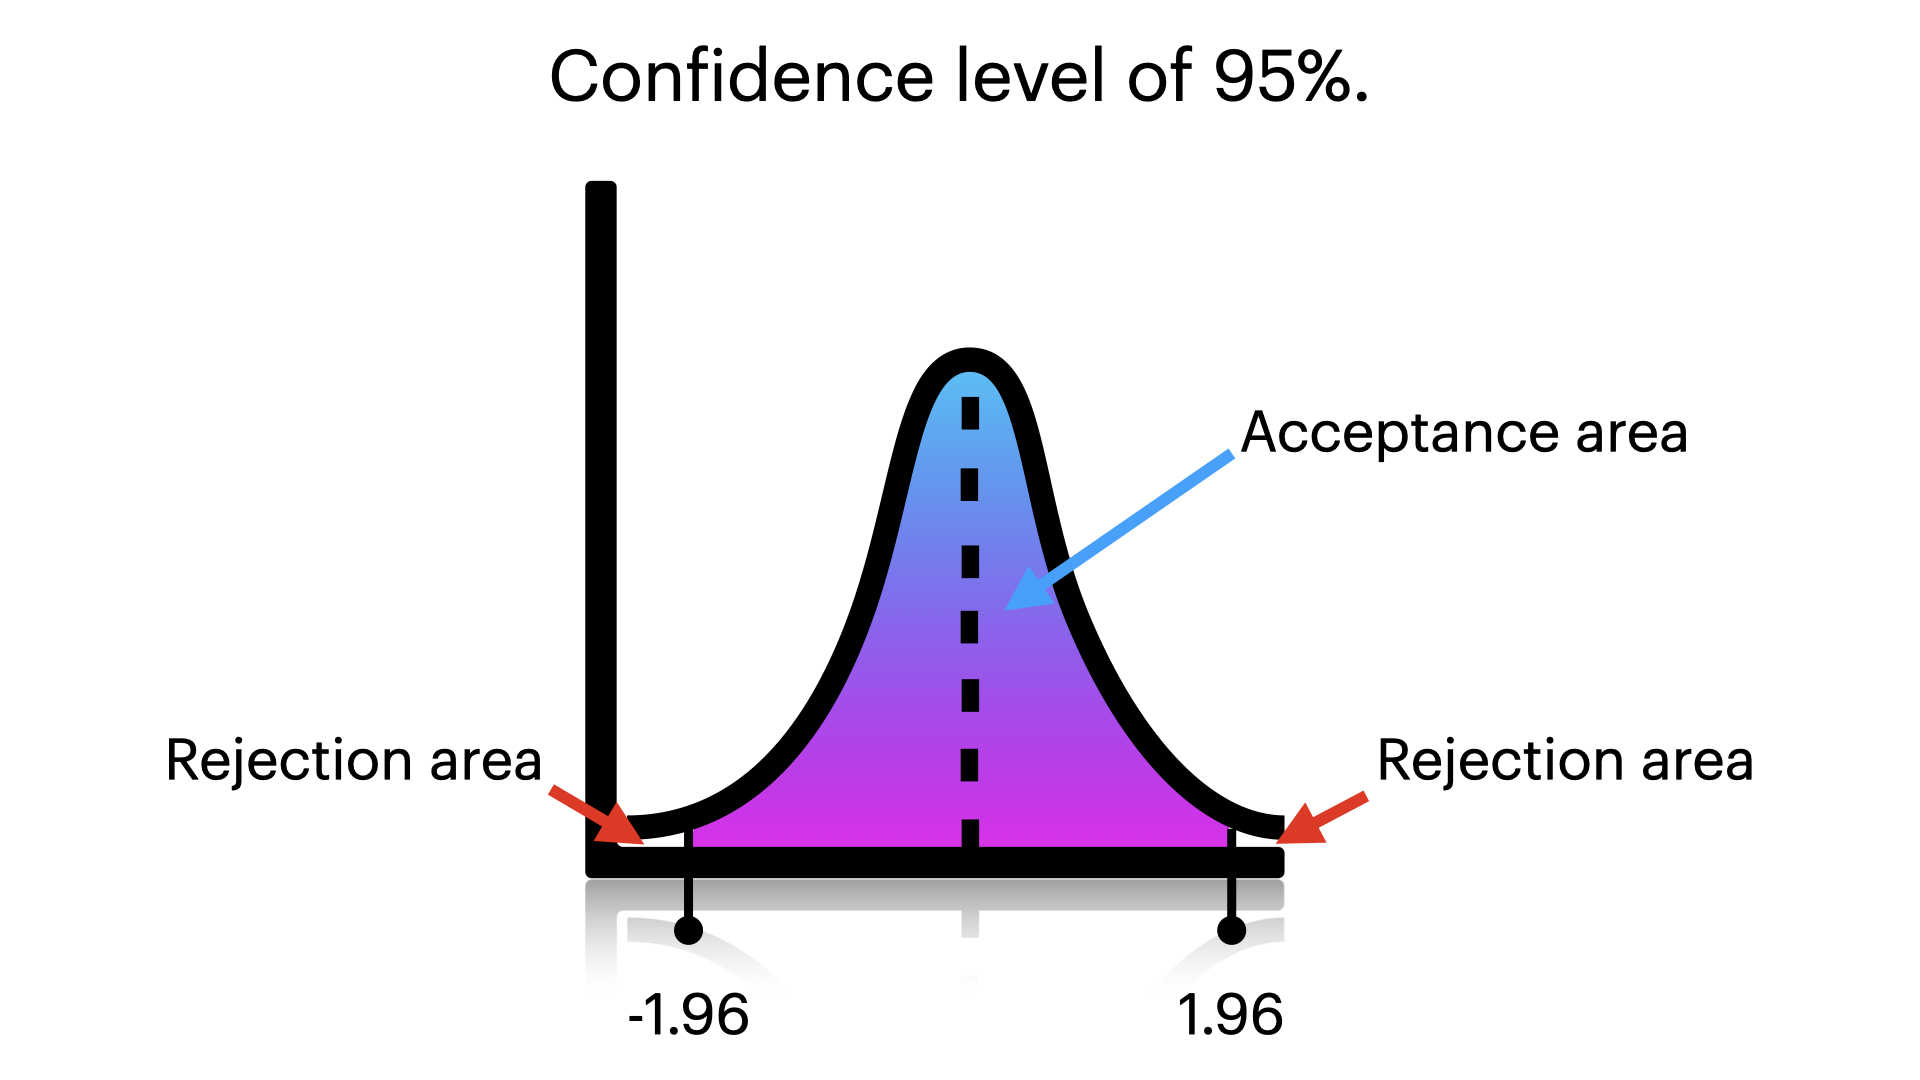


The distribution of the test statistic is a t-distribution with n - k - 1 degrees of freedom, where n is the number of observations and k is the number of regressor variables.

Considering that we want a confidence value of 95% we know that we have 5% in the rejection area, which is divided in two due to the positive and negative area of our test statistic distribution. So each side would be 2.5% respectively.

Therefore, we observe that for the requested confidence level, our rejection areas would be less or equal to -1.96 and equal o greater than 1.96.




#### 4. Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

The F test follows an F distribution with two degrees of freedom: one for the numerator (model degrees of freedom) and one for the denominator (error degrees of freedom). In the model summary, we can find the F statistic, the associated p-value and the degrees of freedom of the model and of the error.

The model summary provides the following relevant information:

* F-statistic (F-statistic): 5.110e+04
* Prob (F-statistic) (p-value associated with F-statistic): 0.00
* Df Model (degrees of freedom of the model): 29
* Df Residuals (error degrees of freedom): 425

In [273]:
df_model = 29
df_error = 425
alpha = 0.05

In [274]:
critical_value = stats.f.ppf(1 - alpha, df_model, df_error)

In [275]:
f_values = np.linspace(0, 10, 1000)
pdf = stats.f.pdf(f_values, df_model, df_error)

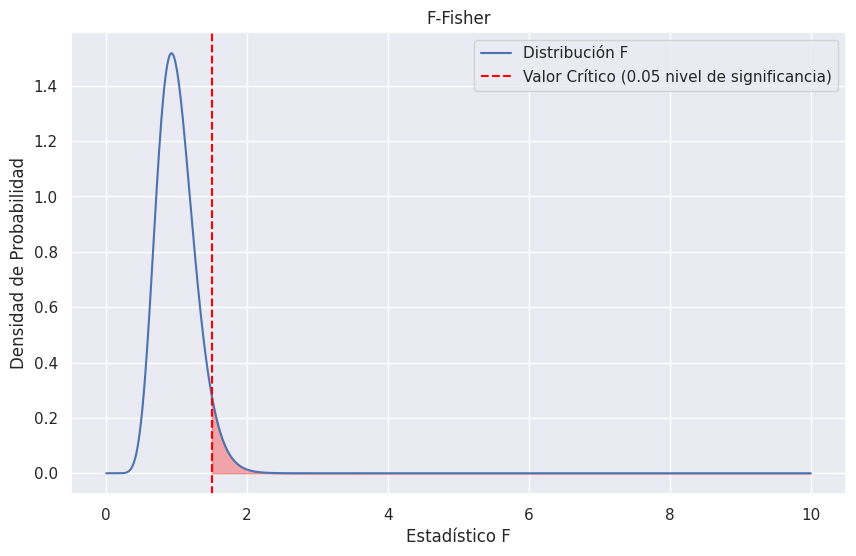

In [276]:
plt.figure(figsize=(10, 6))
plt.plot(f_values, pdf, label="Distribución F")
plt.axvline(critical_value, color='red', linestyle="--", label=f"Valor Crítico ({alpha} nivel de significancia)")
plt.fill_between(f_values, 0, pdf, where=(f_values > critical_value), color="red", alpha=0.3)
plt.xlabel("Estadístico F")
plt.ylabel("Densidad de Probabilidad")
plt.title("F-Fisher")
plt.legend()
plt.show()

As we can see, the calculated value exceeds the significance threshold and, therefore, we can conclude that the model is significant. In other words, we reject the null hypothesis since at least one of the regressor variables has a significant effect on the dependent variable (tumor radius) at a 95% confidence level.

#### 5. Perform a backward regression model. Explain the criteria for eliminating variables from the model.

A backward model elimination consists of having a complete model with all the predictor variables available. Consequently, the predictor variable that has the highest P value is eliminated, this is because the variable that has the weakest relationship with the dependent variable is being eliminated and a lower one (which is retained) is more likely to be real. This leads us to the principle of parsimony, which tells us that if we can explain the same thing in a simpler way it is much better. In addition, there are two main reasons why higher values are removed, one is to improve the accuracy of the model and the other is to reduce multicollinearity.

Eliminating `texture_mean` with `P>|t|` = 0.960

In [277]:
x_backward = x_train_const.copy()
x_backward.drop(["texture_mean"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.582e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 651.26
No. Observations:                 455   AIC:                            -1245.
Df Residuals:                     426   BIC:                            -1125.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `concave points_mean` with `P>|t|` = 0.747

In [278]:
x_backward.drop(["concave points_mean"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.793e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 650.91
No. Observations:                 455   AIC:                            -1246.
Df Residuals:                     427   BIC:                            -1130.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `concave points_mean` with `P>|t|` = 0.664

In [279]:
x_backward.drop(["fractal_dimension_se"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.017e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 650.40
No. Observations:                 455   AIC:                            -1247.
Df Residuals:                     428   BIC:                            -1136.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `symmetry_mean ` with `P>|t|` = 0.657

In [280]:
x_backward.drop(["symmetry_mean"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.235e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 649.06
No. Observations:                 455   AIC:                            -1246.
Df Residuals:                     429   BIC:                            -1139.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `radius_se` with `P>|t|` = 0.350

In [281]:
x_backward.drop(["radius_se"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.486e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 648.22
No. Observations:                 455   AIC:                            -1246.
Df Residuals:                     430   BIC:                            -1143.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `concavity_worst ` with `P>|t|` = 0.405

In [282]:
x_backward.drop(["concavity_worst"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.784e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 648.21
No. Observations:                 455   AIC:                            -1248.
Df Residuals:                     431   BIC:                            -1150.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `symmetry_se ` with `P>|t|` = 0.326

In [283]:
x_backward.drop(["symmetry_se"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.106e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 648.12
No. Observations:                 455   AIC:                            -1250.
Df Residuals:                     432   BIC:                            -1155.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `symmetry_worst ` with `P>|t|` = 0.621

In [284]:
x_backward.drop(["symmetry_worst"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.461e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:28   Log-Likelihood:                 648.10
No. Observations:                 455   AIC:                            -1252.
Df Residuals:                     433   BIC:                            -1162.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `fractal_dimension_mean ` with `P>|t|` = 0.240

In [285]:
x_backward.drop(["fractal_dimension_mean"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.838e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 647.69
No. Observations:                 455   AIC:                            -1253.
Df Residuals:                     434   BIC:                            -1167.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Eliminating `fractal_dimension_worst` with `P>|t|` = 0.254

In [286]:
x_backward.drop(["fractal_dimension_worst"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.242e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 646.95
No. Observations:                 455   AIC:                            -1254.
Df Residuals:                     435   BIC:                            -1171.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.0186 

Eliminating `texture_se` with `P>|t|` = 0.085

In [287]:
x_backward.drop(["texture_se"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.700e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 646.43
No. Observations:                 455   AIC:                            -1255.
Df Residuals:                     436   BIC:                            -1177.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.0186 

Eliminating `texture_worst` with `P>|t|` = 0.090

In [288]:
x_backward.drop(["texture_worst"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.208e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 645.80
No. Observations:                 455   AIC:                            -1256.
Df Residuals:                     437   BIC:                            -1181.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.0186 

Eliminating `concave points_worst` with `P>|t|` = 0.074

In [289]:
x_backward.drop(["concave points_worst"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.795e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 645.56
No. Observations:                 455   AIC:                            -1257.
Df Residuals:                     438   BIC:                            -1187.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.0186      0.00

Eliminating `compactness_se` with `P>|t|` = 0.099

In [290]:
x_backward.drop(["compactness_se"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 644.62
No. Observations:                 455   AIC:                            -1257.
Df Residuals:                     439   BIC:                            -1191.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.0186      0.00

Eliminating `smoothness_se` with `P>|t|` = 0.034

In [291]:
x_backward.drop(["smoothness_se"], inplace=True, axis=1)

model_backward = sm.OLS(y_train.values, x_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.113e+05
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:13:29   Log-Likelihood:                 643.12
No. Observations:                 455   AIC:                            -1256.
Df Residuals:                     440   BIC:                            -1194.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.0186      0.00

As we can see, the multiple regression model was much simpler, reducing the independent variables to 14, which reduces the complexity of the model, reduces the computational costs for modeling and in this case we see that the accuracy of the model is maintained even with slightly less than half the number of variables.

#### 6. Comparison between real data and prediction. Analysis of results.

In [293]:
x_test_std

array([[ 0.53466649,  0.12542914,  0.00889231, ...,  0.14135664,
         0.19736677, -0.8526808 ],
       [-0.46714672, -0.4389997 , -0.43267045, ..., -0.22726897,
         0.5979247 , -0.59217342],
       [-1.23652067, -0.35245119, -0.32547846, ..., -1.19823406,
        -1.26547076, -0.99585221],
       ...,
       [ 0.62299341, -0.16817325, -0.23904248, ..., -0.78996468,
        -0.72231422, -0.75687436],
       [-0.04875605, -0.90859787, -0.84921227, ..., -0.52306068,
         0.06918824, -0.45384615],
       [ 1.07160118, -0.11102638, -0.1565871 , ..., -0.80271829,
        -0.37462994, -1.13525595]])

In [294]:
x_test_std_df = pd.DataFrame(x_test_std, columns=x_train_std.columns)

In [295]:
x_test_std_df

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.534666,0.125429,0.008892,-0.140656,-0.079782,0.405231,0.036943,0.956099,-0.912253,0.078854,...,0.017629,0.606267,0.066418,-0.099769,-0.090726,-0.347143,0.296294,0.141357,0.197367,-0.852681
1,-0.467147,-0.439000,-0.432670,-0.737818,-0.941403,-0.726757,-0.668267,-0.040778,-0.649545,-0.813272,...,-0.370870,-0.546137,-0.435601,-0.407070,-0.446279,-0.637571,-0.387396,-0.227269,0.597925,-0.592173
2,-1.236521,-0.352451,-0.325478,-0.898032,-1.264726,-1.039893,-1.035711,-1.290487,-1.075409,-0.002474,...,-0.289846,-1.317112,-0.365593,-0.338917,-1.363696,-1.227476,-1.184535,-1.198234,-1.265471,-0.995852
3,0.590452,-1.309454,-1.063028,0.550138,-0.802346,-0.841403,-0.936754,0.775505,0.422029,0.113658,...,-1.095929,0.929265,-1.120417,-0.887293,0.874976,-0.842579,-0.982655,-1.161663,-0.039764,-0.067929
4,0.646237,-1.333887,-1.083499,-0.282144,-0.908022,-0.598264,-0.930141,-0.427249,0.387462,-0.344125,...,-1.304722,-0.075437,-1.296034,-0.998720,-0.981805,-1.072391,-0.896048,-1.346975,-0.739939,-0.558264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.078973,1.527184,1.483991,0.862244,0.784892,1.717608,1.889109,0.045907,-0.249951,0.595591,...,1.627718,0.791301,1.427673,1.531517,0.822301,0.759523,1.506078,1.424401,0.591516,0.311529
110,0.762457,-0.540042,-0.507733,-1.009003,-0.985276,-0.882945,-0.935696,-0.961806,-0.442143,-0.619007,...,-0.406188,1.050998,-0.402093,-0.425641,-0.310203,-0.455974,-0.694635,-0.767531,0.325545,-0.122291
111,0.622993,-0.168173,-0.239042,-1.172685,-0.401769,-0.588782,-0.702654,-0.633126,-0.603916,-0.213786,...,-0.275303,0.734493,-0.254898,-0.358014,-1.411981,-0.502797,-0.590352,-0.789965,-0.722314,-0.756874
112,-0.048756,-0.908598,-0.849212,0.028575,0.210732,-0.299985,-0.570394,0.403482,0.269935,0.185753,...,-0.881943,-0.417912,-0.834703,-0.772712,-0.498954,-0.006095,-0.373834,-0.523061,0.069188,-0.453846


In [308]:
x_test_std_df_cons = sm.add_constant(x_test_std_df)

In [309]:
x_test_std_df_cons.drop(["texture_mean", "concave points_mean", "fractal_dimension_se", "symmetry_mean", "radius_se",
"concavity_worst", "symmetry_se", "symmetry_worst", "fractal_dimension_mean",
"fractal_dimension_worst", "texture_se", "texture_worst", "concave points_worst",
"compactness_se", "smoothness_se"], inplace=True, axis=1)

In [310]:
y_hat = model_backward.predict(x_test_std_df_cons)

In [300]:
y_hat

0      18.876613
1      18.383824
2      15.559358
3      11.537208
4       9.656352
         ...    
450    13.851986
451    12.090348
452    11.836651
453    11.360343
454    14.019527
Length: 455, dtype: float64

In [301]:
y_test

86     14.480
454    12.620
309    13.050
416     9.405
553     9.333
        ...  
487    19.440
490    12.250
267    13.590
266    10.600
243    13.750
Name: radius_mean, Length: 114, dtype: float64

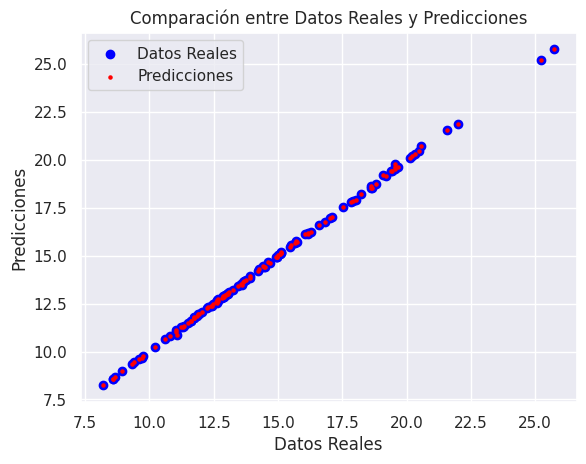

In [324]:
plt.scatter(y_test, y_hat, c="blue", label="Datos Reales")
plt.scatter(y_test, y_hat, c="red", label="Predicciones", s=5)

plt.xlabel("Datos Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Datos Reales y Predicciones")
plt.legend()
plt.show()

In [326]:
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f"Error Cuadrático Medio: {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Cuadrático Medio: 0.00
Coeficiente de Determinación (R^2): 1.00


As we can see, the prediction fits perfectly to the real data. Also, we see that we do not have mean square error and therefore we have perfect R2(R2 = 1). However, we know that in real life this does not happen, since these data have been worked for educational purposes, which is why they give us such perfect values.

## Isai Ambrocio - A01625101